### Gleitkommazahlen

Aufgrund endlicher Resourcen im Rechner birgt die Darstellung reeller Zahlen im Computer eine große Herausforderung. Die Dezimaldarstellung von Zahlen der Form 
$$ x_1 ... x_m, x_{m+1} ... x_n = x_1, x_2 ... x_n \times 10^{m-1}  $$ 
zum Beispiel 
$$ 123,45678 = 1,2345678 \times 10^2$$ 

ist zwar für eine Abbildung im Computer geeignet, da es ausreicht die Zahlenfolge $x_1, ... x_n$ und die Position des Kommas zu speichern. Durch die endliche Menge von Speicher im Rechner, können irrationale Zahlen wie $\pi$ und rationale Zahlen mit einer "sehr langen" Dezimaldarstellung nicht exakt abgebildet werden. 
Es existieren verschiedene Ansätze für die Darstellung solcher Zahlen bei denen immer versucht wird den Approximationsfehler sowohl für die Darstellung von Zahlen als auch für den entstehenden Folgefehler beim Rechnen mit diesen Zahlen möglichst gering zu halten. Diese können aber nie verhindert werden. Die wichtigsten Lektion hierbei ist zu wissen, dass es hierbei Gefahren gibt und dass diese zu Fehlern in der Berechnung führen können, wie an folgenden Beispielen deutlich wird:


In [2]:
import numpy as np
a = np.matrix([1,1])
np.linalg.norm(a)**2

2.0000000000000004

In [10]:
import math
math.sqrt(2)*math.sqrt(2) == 2.


False


Eine dieser Darstellungen sind die __Gleitkommazahlen__. 

Bei der Gleitkommazahl wird, basierend auf der Magnitude der darzustellenden Zahl, die Position des Kommas verschoben (Im Gegensatz zur Festkommazahl). Dies führt zu einem wesentlich vergrößertem Wertebereich und damit flexibleren Einsatzmöglichkeiten.

Eine Gleitkommazahl besteht aus 3 Teilen:
+ Basis $b$: Die Basis bestimmt bezüglich welcher Basis die Zahlen dargestellt werden. Für uns Menschen ist die Basis 10 am verständlichsten (weil wir 10 Finger haben). Im Computer wird die Basis $b=2$ verwendet. 
+ Mantisse $m$: Die Mantisse $m$ enthält die Ziffern der Gleitkommazahl. Je mehr Ziffern man abspeichert, umso genauer ist die Darstellung. Dieser Gleitkommaparameter wird entweder direkt angegeben oder auch in Form der kleinsten Zahl $ \epsilon$ beschrieben, die zu 1 addiert werden kann und ein von 1 verschiedenes Ergebnis liefert $1+\epsilon >1$.
+ Exponent $e$: Der Exponent speichtert die Position des Kommas und damit der Größenordnung der Zahl. 

Damit stellt man die Gleitkommazahl wie folgt dar:

$$ m_0, m_1 ... m_n \times b^e $$

Bei der Darstellung einer Gleitkommazahl im Computer wird immer die Basis b = 2 verwendet und muss deshalb nicht explizit gespeichert werden. Die Darstellung einer Gleitkommazahl im Computer ist damit (hier eine IEEE 64-Bit Gleitkommazahl):

+ 1 Bit für das Vorzeichen
+ 11-Bit für den Exponenten 
+ 52-Bit für die Mantisse

Der Fehler, welcher bei der Abbildung einer beliebigen reellen Zahl in ein Gleitkommazahl-Format mit Mantisse, Basis und Exponent entsteht, hängt offensichtlich (oder zumindest intuitiv) von diesen gewählten Parametern ab. 

Wie bei der Rundung üblich tritt der maximale Fehler, welcher durch Rundung auf die nächste Gleitkommazahl entstehen kann genau dann auf, wenn man in der Mitte zwischen zwei benachbarten Gleitkommazahlen ist, siehe Abbildung 1 in rot. 

![Maximaler Rundungsfehler zwischen zwei darstellbaren Gleitkommazahlen.](./images/floating_point_1.png)

Um den maximalen Rundungsfehler zu verstehen, müssen wir also den Abstand zweier Gleitkommazahlen
bestimmen. Abbildung 2 zeigt Ihnen die darstellbaren Gleitkommazahlen in Abhängigkeit der Größe der Zahl und der Mantissenlänge. 

![Abstände von Gleitkommazahlen](https://upload.wikimedia.org/wikipedia/de/thumb/0/0b/Gleitkommazahlen.svg/500px-Gleitkommazahlen.svg.png)

Diese Abhängig des Abstandes von Gleitkommazahlen und des Rundungsfehlers bei der Abbildung ist nicht zufällig, sondern stellt einen Kompromiss dar zwischen der Abdeckung eines großen Wertebereiches (für 64-bit Gleitkommazahlen hat man xˆmin ≈ 2.2251 × 10−308 und xˆmax = 1.7977 × 10308) in R und einer fest und nicht von der Größe der Zahl abhängigen Anzahl von Bits zur Darstellung einer Zahl. Der Kompromiss basiert dabei auf der Beobachtung, dass in sehr vielen Anwendungen der tolerierbare Fehler von der Magnitude der Ergebnisse abhängt. Zum Beispiel, wenn die darzustellende Zahl 6.0 ist und man stellt diese als 10 dar, dann ist der Fehler für die allermeisten Anwendungen vollkommen inakzeptabel. Will man jedoch 100000003.0 darstellen und dies wird als 100000000.0 abgebildet, so ist dies in vielen Fällen verwendbar. Diese Abhängigkeit des Fehlers von der Größenordnung einer Zahl wird im relativen Fehler formalisiert.


#### Genauigkeit von Gleitkommazahlen

Die maximale Genauigkeit einer Gleitkommazahldarstellung wird Maschinengenauigkeit $\epsilon$ genannt (obwohl sie heutzutage nicht mehr von der Maschine, d.h. der Hardware, abhängig ist, sondern lediglich von der für die Anzahl der zur Computerdarstellung verwendeten Bits). 

Die Maschinengenauigkeit ist (zwei Mal) die kleinste Zahl $\delta$, so dass (1 + $\delta$) nicht wieder auf 1 gerundet wird, d.h. $$ \epsilon = \frac{1}{2} \min_{\delta} (1+\delta) > 1$$


In Python kann man sich die Machinengenauigkeit für jeden Datentypen ausgeben lassen:


In [70]:
np.finfo(np.float64).eps

2.2204460492503131e-16

Zwei Zahlen die eigentlich nicht gleich sein können, werden dann als gleiche Zahlen im Rechner interpretiert.

In [77]:
1+1e-16

1.0

umgekehrtes Beispiel. Hier wissen wir, dass zwei Zahlen eigentlich gleich sein sollte, aber sie werden als solche nicht erkannt. 

In [9]:
a = 1e12
b = 1e-6
a + b == a - b

True

#### Auslöchung

Einfaches Beispiel für den Effekt der Auslöschung anhand der Berechnung des numerischen Gradienten einer Funktion $$f'(x) = \lim\limits_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}$$

Die Ursache für die Auslöschung liegt in den verschiedenen Größenordnungen von Minuend bzw. Subtrahend und Differenz. In der Gleitkomma-Darstellung ist dieser Unterschied erkennbar. Die Subtraktion löscht alle Ziffern am Anfang der Mantisse $m$ aus, welche für Minuend und Subtrahend gleich sind. Die Genauigkeit des Ergebnisses wird damit nur durch die Ziffern bestimmt, in welchen sich die Terme unterscheiden. Durch den Unterschied in der Größenordnung von Eingabe und Ausgabe der Subtraktion können sich jedoch nur wenige Ziffern am Ende unterscheiden (ansonsten wäre das Ergebnis nicht wesentlich kleiner als Minuend und Subtrahend). 

Im folgenden Beispiel gehen uns durch die Subtraktion von $f(i+eps)$ und $f(i)$ Ziffern verloren. Wir sehen also, dass Auslöschung immer dann auftritt, wenn zwei relativ zum Ergebnis große Zahlen subtrahiert werden, welche sich nur geringfügig unterscheiden, d.h. wenn die Differenz wesentlich kleiner ist, als die Zahlen selbst. Interessanter Weise tritt bei keiner anderen der verbleibenden grundlegenden arithmetischen Operationen, Addition, Multiplikation und Division, eine vergleichbare Potenzierung des relativen Fehlers auf.

Hier ein Beispiel für die numerische Ableitung einer einfachen Funktion $f(x) = 10^6x$

[1000000.0, 999999.9998835847, 1000000.0002328306, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 999999.9990686774, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0018626451, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 999999.9962747097, 999999.9962747097, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 1000000.0, 100

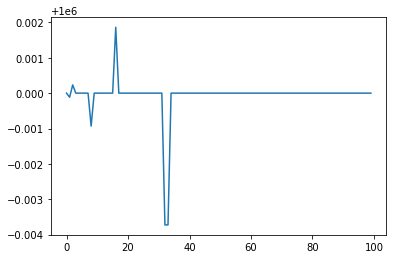

In [11]:
import matplotlib.pyplot as plt

def f(x):
    return 10**6*x
#     return 10**6*x*x

eps = 1e-6
grad = []
for i in range(100):
    grad.append((f(i+eps) - f(i)) / eps)
    #grad.append( 10**6*2*i - ((f(i+eps) - f(i)) / eps))

print(grad)
plt.plot(grad)
plt.show()

Unterhaltsames Beispiel - Populationsmodell:

Ein Populationsmodell wird benutzt, um sich zu überlegen, wie sich eine Population entwickelt. Ein sehr einfaches Modell ist das folgende. Eine Population $x$ liegt immer zwischen $x \in [0,1]$. Sie fängt mit irgendeinem Wert an $x_0$. Die Population in der nächsten Generation wird dann modelliert als:
$$
r \cdot x_i \cdot (1-x_i)
$$
Die Idee dabei ist, dass wenn die Population zu groß wird stirbt sie aus, weil sie nicht mehr genug Resourcen hat. Wenn sie zu klein wird auch (Faktor $x_i$). Das Modell hier ist stark vereinfacht. Es geht aber auch eher darum, was für überraschende Effekte es liefert. Das Verhalten des Modells ist nur abhängig von $r$ und nicht vom Startwert. 

Schauen wir uns damit mal folgende Beispielwerte an - und deren nicht wirklich überraschende Ergebnisse:
Es gibt da einige stationäre Werte - 2.0, Werte die gegen 0 gehen - 1.0. Es gibt allerdings auch Werte die in eine 2er-Periode übergehen (ab ~3.0). Hier findet dann zunächst für größere Werte auch eine Periodenverdopplung statt. Diese endet dann aber im Chaos. 

Hier hat man in den ersten computergenerierten Implementierungen geglaubt, es gäbe ein Problem mit den Gleitkommazahlen, das ist aber nicht der Fall ;)

In [17]:
x = 0.5
r = 3.0 # 1.0, 2.0, 3.0
x = r * x * (1-x)
print(x)
x = r * x * (1-x)
print(x)
x = r * x * (1-x)
print(x)
x = r * x * (1-x)
print(x)
x = r * x * (1-x)
print(x)
x = r * x * (1-x)
print(x)
x = r * x * (1-x)
print(x)

0.75
0.5625
0.73828125
0.5796661376953125
0.7309599195141345
0.5899725467340735
0.7257148225025549


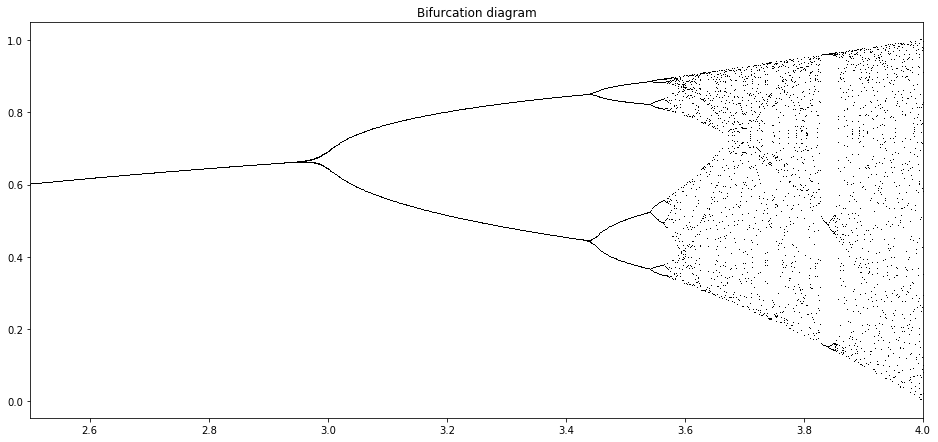

In [18]:
import numpy as np
n = 1000
r = np.linspace(2.5,4.0,n)
iterations = 100
last = 10
x = 1e-5*np.ones(n)
plt.figure(figsize=(16,16))
plt.subplot(211)
for i in range(iterations):
    x = r*x*(1-x)
    if i>=(iterations-last):
        plt.plot(r,x,',k')

plt.xlim(2.5,4)
plt.title("Bifurcation diagram")

plt.show()